LEVEL1 -TASK2: CITY ANALYSIS

--2:1 Identify the city with the highest number of restaurant in the dataset.

--2:2 Calculate the average rating for restaurant in each city.

--2:3 Determine the city with the highest average rating.

2:1 IDENTIFY THE CITY WITH THE HIGHEST NUMBER OF RESTAURANT IN THE DATASET.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#import data
dataset= pd.read_csv("dataset.csv")

In [3]:
#check data
dataset.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
#check database shape
dataset.shape

(9551, 21)

In [5]:
#check dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
#check daatset column names
dataset.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

Data Preprocessing

In [7]:
#check for null values
pd.isnull(dataset).sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [8]:
#drop all null values
dataset.dropna(inplace=True)

In [9]:
#check database
dataset.shape

(9542, 21)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu  9542

In [11]:
#check description of data
dataset[['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']].describe()

,Average Cost for two,Price range,Aggregate rating,Votes
count,9542.000000,9542.000000,9542.000000,9542.000000
mean,1200.326137,1.804968,2.665238,156.772060
std,16128.743876,0.905563,1.516588,430.203324
min,0.000000,1.000000,0.000000,0.000000
25%,250.000000,1.000000,2.500000,5.000000
50%,400.000000,2.000000,3.200000,31.000000
75%,700.000000,2.000000,3.700000,130.000000
max,800000.000000,4.000000,4.900000,10934.000000


In [12]:
#find the city wiht the highest number of resturants
city_counts= dataset["City"].value_counts()

#get city wiht maximumcount
top_city= city_counts.idxmax()
top_count= city_counts.max()
top_city, top_count

('New Delhi', 5473)

2:2 CALCULATE THE AVERAGE RATING FOR RESTAURANTS IN EACH CITY.

In [13]:
#group by city and calculate the average rating
average_rating_per_city= dataset.groupby('City')['Aggregate rating'].mean()

#display the result
print(average_rating_per_city)

average_rating_per_city_sorted= average_rating_per_city.sort_values(ascending=False) 
print(average_rating_per_city_sorted)

City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.552941
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 140, dtype: float64
City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
                      ...   
New Delhi           2.438845
Montville           2.400000
Mc Millan           2.400000
Noida               2.036204
Faridabad           1.866932
Name: Aggregate rating, Length: 140, dtype: float64


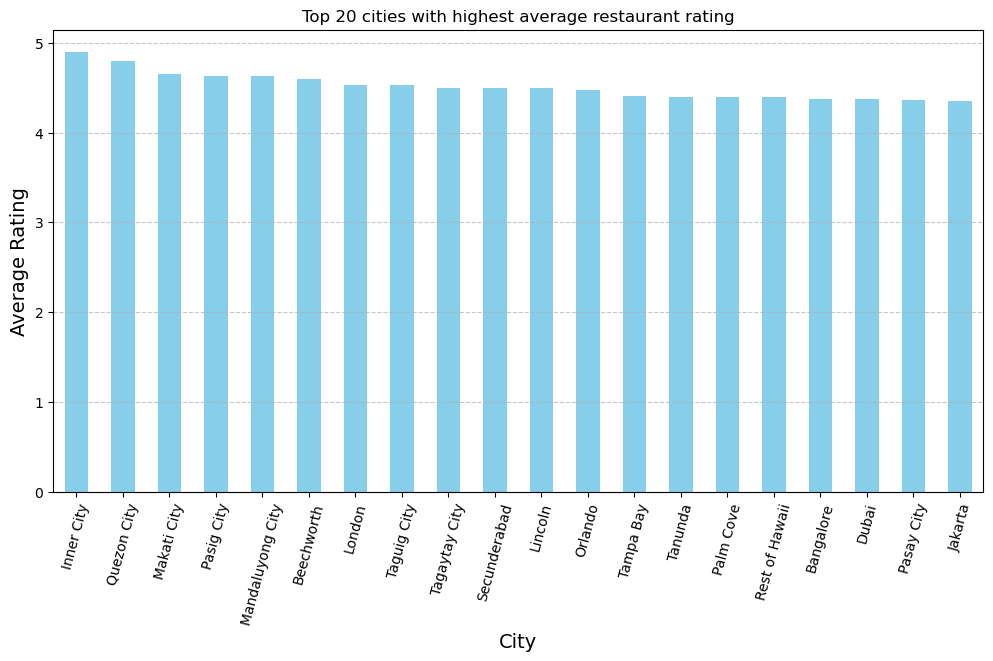

In [14]:
#calculate the average rating
city_avg_rating= dataset.groupby('City')['Aggregate rating'].mean()

#sort the average rating in descending order
city_avg_rating= city_avg_rating.sort_values(ascending=False)

#plot the top 20 cities with the highest average rating
plt.figure(figsize=(12,6))
city_avg_rating.head(20).plot(kind="bar", color="skyblue")

plt.title("Top 20 cities with highest average restaurant rating")
plt.xlabel("City", fontsize=14)
plt.ylabel("Average Rating", fontsize=14)
plt.xticks(rotation=75,ha='center')
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

2:3 DETERMINE THE CITY WITH THE HIGHEST AVERAGE RATING.

In [15]:
#calculate the average rating for each city
city_avg_rating= dataset.groupby("City")["Aggregate rating"].mean()


#find the city with highet average rating
highest_avg_rating_city= city_avg_rating.idxmax()
highest_avg_rating= city_avg_rating.max()
print(f"The city with the highest average rating is {highest_avg_rating_city} with an average rating of {highest_avg_rating:.2f}.")

The city with the highest average rating is Inner City with an average rating of 4.90.


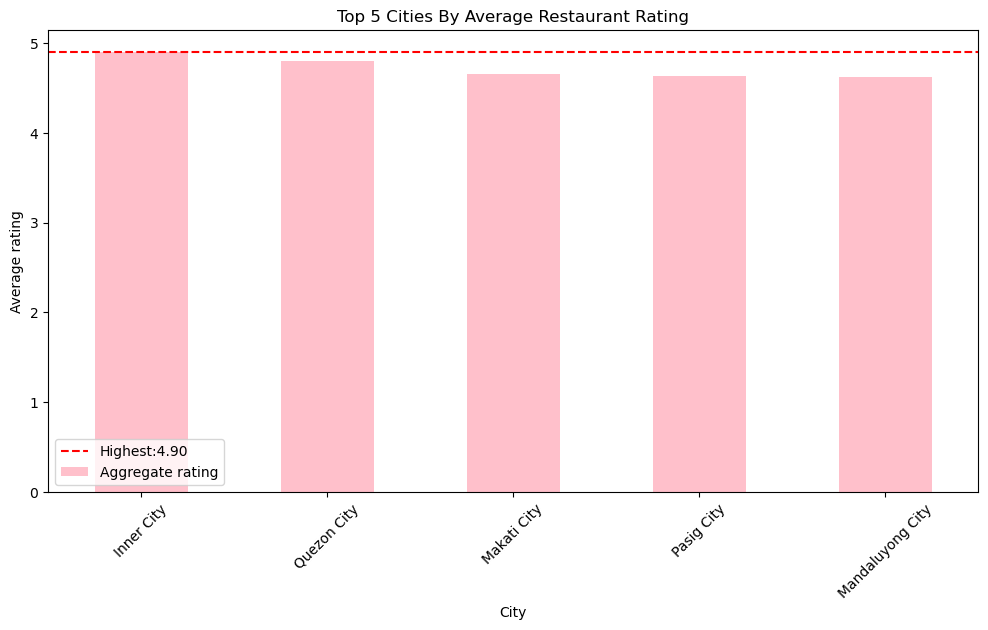

In [18]:
#group by city and calculate the mean rating
city_avg_ratings= dataset.groupby("City")["Aggregate rating"].mean().sort_values(ascending=False)

#get the top city
top_city=city_avg_ratings.idxmax()
top_rating= city_avg_ratings.max()

#plot the top 5 cities by average rating
plt.figure(figsize=(12,6))
city_avg_ratings.head(5).plot(kind="bar",color="pink")
plt.axhline(y=top_rating, color="r",linestyle='--',label=f'Highest:{top_rating:.2f}')
plt.title("Top 5 Cities By Average Restaurant Rating")
plt.xlabel("City")
plt.ylabel("Average rating")
plt.xticks(rotation=45)
plt.legend()
plt.show()